In [2]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
occu <- read.csv("occupancy_short_names.csv")

In [4]:
head(occu)

,Day,Date,Headcount,Time,DaysSinceStart,TableRentals,VideoRentals,BoardRentals,TotalRentals,TableDur,VideoDur,BoardDur,TotalDur,MinutesSinceOpen
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Thursday,8/24/2023,2,12:15,1,10,0,0,10,327,0,0,327,150
2,Thursday,8/24/2023,2,12:40,1,10,0,0,10,327,0,0,327,175
3,Thursday,8/24/2023,0,13:00,1,10,0,0,10,327,0,0,327,195
4,Thursday,8/24/2023,2,13:17,1,10,0,0,10,327,0,0,327,212
5,Thursday,8/24/2023,3,13:35,1,10,0,0,10,327,0,0,327,230
6,Thursday,8/24/2023,6,14:15,1,10,0,0,10,327,0,0,327,270


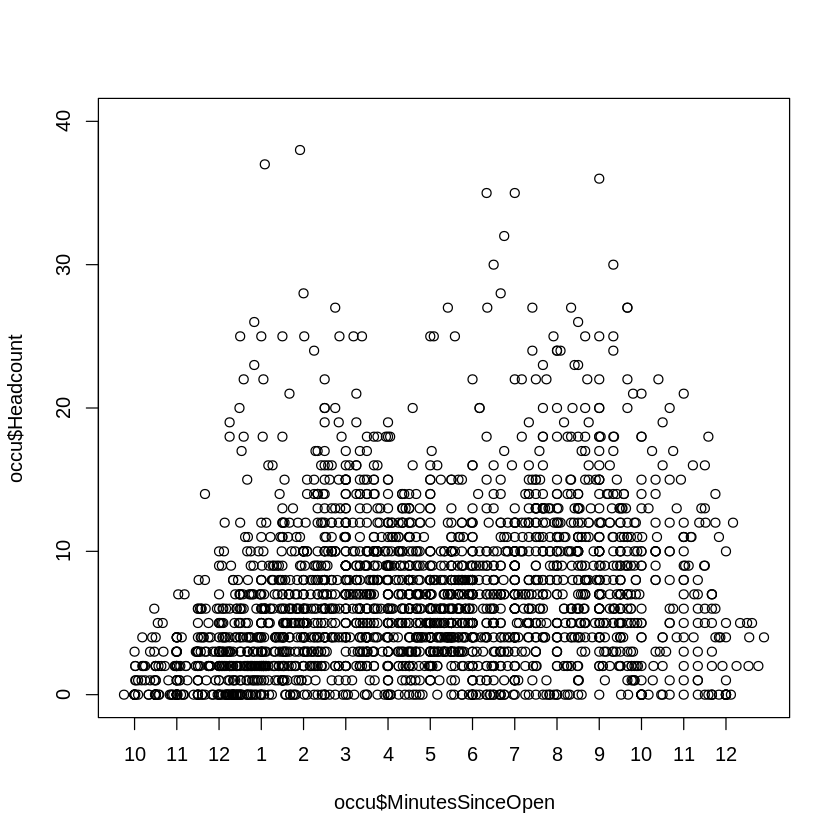

In [5]:
#making a plot with hour axis
plot(occu$MinutesSinceOpen, occu$Headcount, ylim=c(0,40), xaxt='n')
axis(1, at=c(15,75,135,195,255,315,375,435,495,555,615,675,735,795,855), labels=c(10,11,12,1,2,3,4,5,6,7,8,9,10,11,12))

In [6]:
#trying out some dinky models
basic_model <- lm(Headcount ~ I(DaysSinceStart^2), data=occu)
summary(lm(Headcount ~ DaysSinceStart + MinutesSinceOpen, data=occu))


Call:
lm(formula = Headcount ~ DaysSinceStart + MinutesSinceOpen, data = occu)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.065  -3.682  -0.929   2.643  57.336 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.7621778  0.3357368  17.163  < 2e-16 ***
DaysSinceStart   -0.0271107  0.0035224  -7.697 2.02e-14 ***
MinutesSinceOpen  0.0065193  0.0005831  11.180  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.825 on 2418 degrees of freedom
Multiple R-squared:  0.07144,	Adjusted R-squared:  0.07068 
F-statistic: 93.02 on 2 and 2418 DF,  p-value: < 2.2e-16


In [85]:
all_model <- lm(Headcount ~ DaysSinceStart + MinutesSinceOpen + TotalRentals + TotalDur
                + I(DaysSinceStart^2) + I(MinutesSinceOpen^2) + I(TotalRentals^2) + I(TotalDur^2)
                + I(DaysSinceStart * MinutesSinceOpen) + I(DaysSinceStart * TotalRentals) + I(DaysSinceStart * TotalDur)
                + I(MinutesSinceOpen * TotalRentals) + I(MinutesSinceOpen * TotalDur) + I(TotalRentals * TotalDur),
                data = occu)

In [86]:
summary(all_model)


Call:
lm(formula = Headcount ~ DaysSinceStart + MinutesSinceOpen + 
    TotalRentals + TotalDur + I(DaysSinceStart^2) + I(MinutesSinceOpen^2) + 
    I(TotalRentals^2) + I(TotalDur^2) + I(DaysSinceStart * MinutesSinceOpen) + 
    I(DaysSinceStart * TotalRentals) + I(DaysSinceStart * TotalDur) + 
    I(MinutesSinceOpen * TotalRentals) + I(MinutesSinceOpen * 
    TotalDur) + I(TotalRentals * TotalDur), data = occu)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.419  -3.082  -0.474   2.348  55.711 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -3.581e+00  1.419e+00  -2.524  0.01168 *  
DaysSinceStart                       -6.911e-03  2.348e-02  -0.294  0.76856    
MinutesSinceOpen                      2.540e-02  2.820e-03   9.005  < 2e-16 ***
TotalRentals                          1.272e-01  6.557e-02   1.940  0.05253 .  
TotalDur                             -1.710e-04  1.533e-03  -0.112  0.9112

In [87]:
step(all_model, direction = "backward")

Start:  AIC=8027.76
Headcount ~ DaysSinceStart + MinutesSinceOpen + TotalRentals + 
    TotalDur + I(DaysSinceStart^2) + I(MinutesSinceOpen^2) + 
    I(TotalRentals^2) + I(TotalDur^2) + I(DaysSinceStart * MinutesSinceOpen) + 
    I(DaysSinceStart * TotalRentals) + I(DaysSinceStart * TotalDur) + 
    I(MinutesSinceOpen * TotalRentals) + I(MinutesSinceOpen * 
    TotalDur) + I(TotalRentals * TotalDur)

                                       Df Sum of Sq   RSS    AIC
- TotalDur                              1       0.3 65870 8025.8
- DaysSinceStart                        1       2.4 65872 8025.8
- I(DaysSinceStart * TotalDur)          1       4.8 65874 8025.9
- I(TotalRentals^2)                     1      11.2 65881 8026.2
- I(MinutesSinceOpen * TotalRentals)    1      18.0 65887 8026.4
- I(DaysSinceStart * MinutesSinceOpen)  1      27.5 65897 8026.8
- I(TotalRentals * TotalDur)            1      40.8 65910 8027.3
- I(TotalDur^2)                         1      50.9 65920 8027.6
<none>     


Call:
lm(formula = Headcount ~ MinutesSinceOpen + TotalRentals + I(DaysSinceStart^2) + 
    I(MinutesSinceOpen^2) + I(DaysSinceStart * TotalRentals) + 
    I(MinutesSinceOpen * TotalDur), data = occu)

Coefficients:
                     (Intercept)                  MinutesSinceOpen  
                      -4.114e+00                         2.643e-02  
                    TotalRentals               I(DaysSinceStart^2)  
                       1.322e-01                         4.321e-04  
           I(MinutesSinceOpen^2)  I(DaysSinceStart * TotalRentals)  
                      -3.286e-05                        -1.463e-03  
  I(MinutesSinceOpen * TotalDur)  
                       4.097e-06  


In [88]:
new_model <- lm(formula = Headcount ~ MinutesSinceOpen + TotalRentals + I(DaysSinceStart^2) +
    I(MinutesSinceOpen^2) + I(DaysSinceStart * TotalRentals) +
    I(MinutesSinceOpen * TotalDur), data = occu)

summary(new_model)


Call:
lm(formula = Headcount ~ MinutesSinceOpen + TotalRentals + I(DaysSinceStart^2) + 
    I(MinutesSinceOpen^2) + I(DaysSinceStart * TotalRentals) + 
    I(MinutesSinceOpen * TotalDur), data = occu)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.503  -3.068  -0.449   2.298  55.928 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -4.114e+00  6.325e-01  -6.504 9.49e-11 ***
MinutesSinceOpen                  2.643e-02  2.199e-03  12.022  < 2e-16 ***
TotalRentals                      1.322e-01  1.132e-02  11.679  < 2e-16 ***
I(DaysSinceStart^2)               4.321e-04  5.077e-05   8.511  < 2e-16 ***
I(MinutesSinceOpen^2)            -3.286e-05  2.508e-06 -13.102  < 2e-16 ***
I(DaysSinceStart * TotalRentals) -1.463e-03  1.460e-04 -10.018  < 2e-16 ***
I(MinutesSinceOpen * TotalDur)    4.097e-06  5.520e-07   7.422 1.59e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual stan

In [89]:
car::vif(new_model)

MinutesSinceOpen                     TotalRentals 
                       17.650724                         2.899154 
             I(DaysSinceStart^2)            I(MinutesSinceOpen^2) 
                        3.608505                        18.227820 
I(DaysSinceStart * TotalRentals)   I(MinutesSinceOpen * TotalDur) 
                        3.117021                         6.632892